# Credit Card Fraud Classification
- **@author: Raj Adhikari**
-  This Notebook explore **Credit Card Fradulent Detection** with various **Machine learning models**
-  **APIs** : pandas, numpy, sklearn

## Libraries

In [2]:
import pandas as pd
import numpy as np

## Loading Dataset

In [5]:
credit_df = pd.read_csv("~/CodSoft/Datasets/Credit Card Fraud Detection/fraudTrain.csv")
credit_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Dataset Information

In [7]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Observation
- **Total Rows** : 12,96,675(1.2 Million entires)
- **Total Columns** : 22 with 12 Object types an 10 numerical (int64 and float64)
- **NO NULL** values in the dataset

## Data Columns : Numerical and Categorical

In [10]:
num_cols = credit_df.select_dtypes(include=np.number).columns.tolist()
cate_cols = credit_df.select_dtypes(include="object").columns.tolist()

In [11]:
# numerical cols
num_cols

['Unnamed: 0',
 'cc_num',
 'amt',
 'zip',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [12]:
# categorical cols
cate_cols

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

## EDA : Heatmap

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

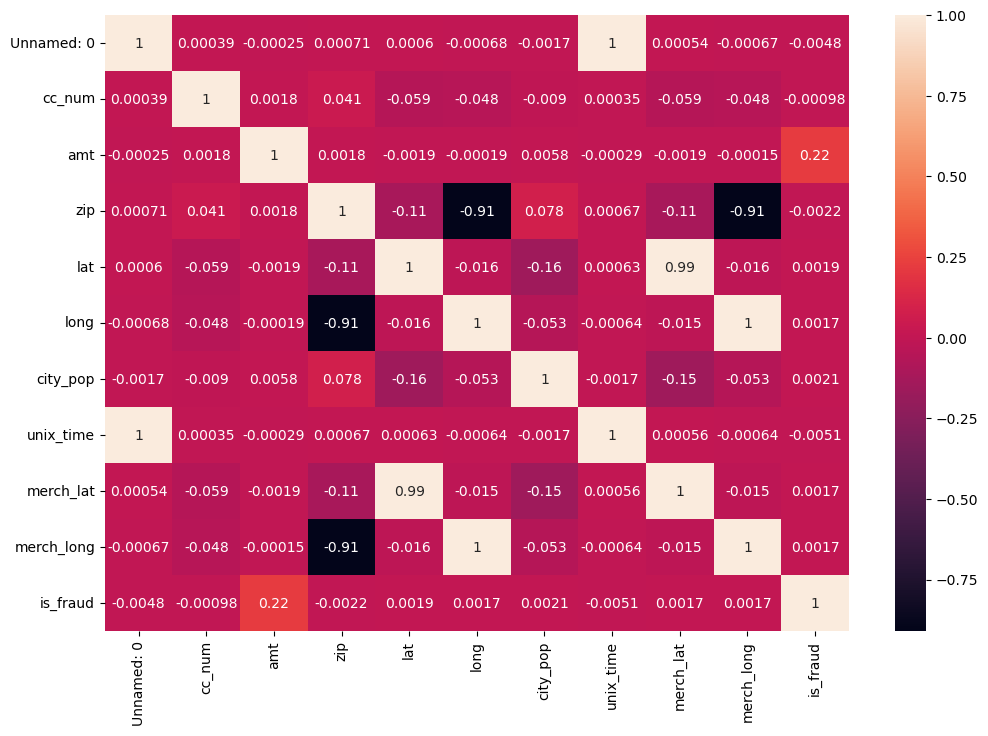

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(credit_df.corr(numeric_only=True), annot=True)

### Observations
- **is_fraud** is being affected by certain param
  - **amt** : Amount seem to be affecting how much things would get affected
  - **merch_lat** and **merch_long** at 0.17
  - **lat** as 0.19
  - **city_pop** : card holder's city population

## EDA : Numerical Columns

### Col : Unnamed 0

In [19]:
# First 5 values
# Last 5 values
print("First and Last 5 values")
print(credit_df['Unnamed: 0'].head(len(credit_df)-5))

First and Last 5 values
0                0
1                1
2                2
3                3
4                4
            ...   
1296665    1296665
1296666    1296666
1296667    1296667
1296668    1296668
1296669    1296669
Name: Unnamed: 0, Length: 1296670, dtype: int64


### Observations
- **All values** are same as **index values**
- Thus, it bears **NO Direct Effect** to the output
- We can ignore the **Unnamed : 0** column

### Col : CC_num

In [22]:
# credit card number
print(credit_df['cc_num'].describe())

count    1.296675e+06
mean     4.171920e+17
std      1.308806e+18
min      6.041621e+10
25%      1.800429e+14
50%      3.521417e+15
75%      4.642255e+15
max      4.992346e+18
Name: cc_num, dtype: float64


In [23]:
# Checking for Values counts
print(credit_df['cc_num'].value_counts())

cc_num
571365235126           3123
4512828414983801773    3123
36722699017270         3119
213112402583773        3117
3545109339866548       3113
                       ... 
180097223252063           7
4225628813173670          7
501894933032              7
4975457191020             7
340187018810220           7
Name: count, Length: 983, dtype: int64


In [24]:
# Checking for unique Values
print(credit_df['cc_num'].nunique())

983


### Observations
- Out of 1.2 Million records, **983 are unique** : ie many Repeat over the time **thus possible fradulent numbers**

### Col : Zip

In [27]:
# credit card number
print(credit_df['zip'].describe())

count    1.296675e+06
mean     4.880067e+04
std      2.689322e+04
min      1.257000e+03
25%      2.623700e+04
50%      4.817400e+04
75%      7.204200e+04
max      9.978300e+04
Name: zip, dtype: float64


In [28]:
# Checking for Values counts
print(credit_df['zip'].value_counts())

zip
73754    3646
34112    3613
48088    3597
82514    3527
49628    3123
         ... 
46510       7
16041       7
38915       7
10018       7
23523       7
Name: count, Length: 970, dtype: int64


In [29]:
# Checking for unique Values
print(credit_df['zip'].nunique())

970


### Observations
- Similar to cc_num, Out of 1.2 Million records, **970 are unique** : ie many Repeat over the time **thus possible fradulent numbers**

## EDA : Categorical Data

### Converting trans_date_trains_time to time_date obj

In [33]:
# Date and Time obj
credit_df['trans_date_trans_time'] = pd.to_datetime(credit_df['trans_date_trans_time'])

In [34]:
credit_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [35]:
## Setting data and time
credit_df['date'] = credit_df['trans_date_trans_time'].dt.date
credit_df['time'] = credit_df['trans_date_trans_time'].dt.time

In [36]:
credit_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51


### Date

In [38]:
## Turning date string to datetime
credit_df['date'] = pd.to_datetime(credit_df['date'])

## Extract Year, Month, Day
credit_df['year'] = credit_df['date'].dt.year
credit_df['month'] = credit_df['date'].dt.month
credit_df['day'] = credit_df['date'].dt.day

### Time

In [40]:
## Extract Year, Month, Day
credit_df['hour'] = credit_df['date'].dt.hour
credit_df['minute'] = credit_df['date'].dt.minute
credit_df['second'] = credit_df['date'].dt.second

In [41]:
credit_df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merch_long,is_fraud,date,time,year,month,day,hour,minute,second
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-82.048315,0,2019-01-01,00:00:18,2019,1,1,0,0,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.186462,0,2019-01-01,00:00:44,2019,1,1,0,0,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.154481,0,2019-01-01,00:00:51,2019,1,1,0,0,0


### EDA : is_fraud
- Dataset is too large to work with thus we **use sampling**

## Pefroming Sampling

In [44]:
sample_df = credit_df.sample(frac=0.1, random_state=42)

In [45]:
print(f"Non Fraud : {sample_df['is_fraud'].value_counts()[0]/len(sample_df)*100:.2f}")
print(f" Fraud : {sample_df['is_fraud'].value_counts()[1]/len(sample_df)*100:.2f}")

Non Fraud : 99.40
 Fraud : 0.60


<Axes: xlabel='is_fraud', ylabel='count'>

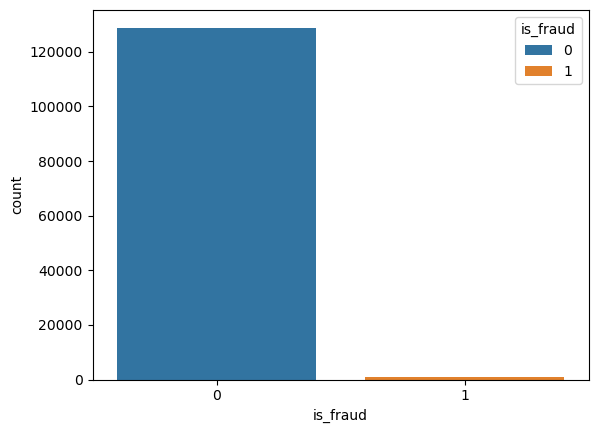

In [46]:
sns.countplot(data=sample_df, x='is_fraud', hue='is_fraud')

### HYPOTHESES:
- Apporx 0.6% Of dataset has fraud instances

In [48]:
# Testing Hypothesis
print(f"Non Fraud : {credit_df['is_fraud'].value_counts()[0]/len(credit_df)*100:.2f}")
print(f"Fraud     : {credit_df['is_fraud'].value_counts()[1]/len(credit_df)*100:.2f}")

Non Fraud : 99.42
Fraud     : 0.58


### Observations
- Hypothesis 99.99% correct
- Dataset is heavily favouring non fraudulent actions : Similar to that of real world

## Checking For frauds over the years

In [51]:
# YEARS
sample_df['year'].value_counts()

year
2019    92479
2020    37189
Name: count, dtype: int64

In [52]:
# MONTHS
sample_df['month'].value_counts()

month
5     14703
6     14441
3     14421
12    14238
4     13377
1     10318
2      9773
7      8759
8      8703
9      7073
11     7039
10     6823
Name: count, dtype: int64

### Observations
- Around **0.6%** of dataset contains fradulent transcations
- With Apporx 10% data sample
- Second half of a year records lower transaction amount than first half

In [54]:
sample_df[sample_df['is_fraud'] == 1]['month'].value_counts()

month
5     99
1     89
2     88
3     83
6     73
12    68
4     60
9     49
8     45
10    43
11    41
7     35
Name: count, dtype: int64

In [55]:
sample_df[sample_df['is_fraud'] == 1]['year'].value_counts()

year
2019    525
2020    248
Name: count, dtype: int64

### EDA: Category

In [58]:
sample_df[sample_df['is_fraud'] == 1]['category'].value_counts()

category
shopping_net      179
grocery_pos       177
shopping_pos      101
misc_net           84
gas_transport      62
home               29
misc_pos           28
entertainment      23
personal_care      22
kids_pets          17
grocery_net        14
health_fitness     14
food_dining        12
travel             11
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'misc_pos'),
  Text(1, 0, 'health_fitness'),
  Text(2, 0, 'shopping_pos'),
  Text(3, 0, 'home'),
  Text(4, 0, 'gas_transport'),
  Text(5, 0, 'grocery_pos'),
  Text(6, 0, 'food_dining'),
  Text(7, 0, 'shopping_net'),
  Text(8, 0, 'entertainment'),
  Text(9, 0, 'grocery_net'),
  Text(10, 0, 'kids_pets'),
  Text(11, 0, 'personal_care'),
  Text(12, 0, 'misc_net'),
  Text(13, 0, 'travel')])

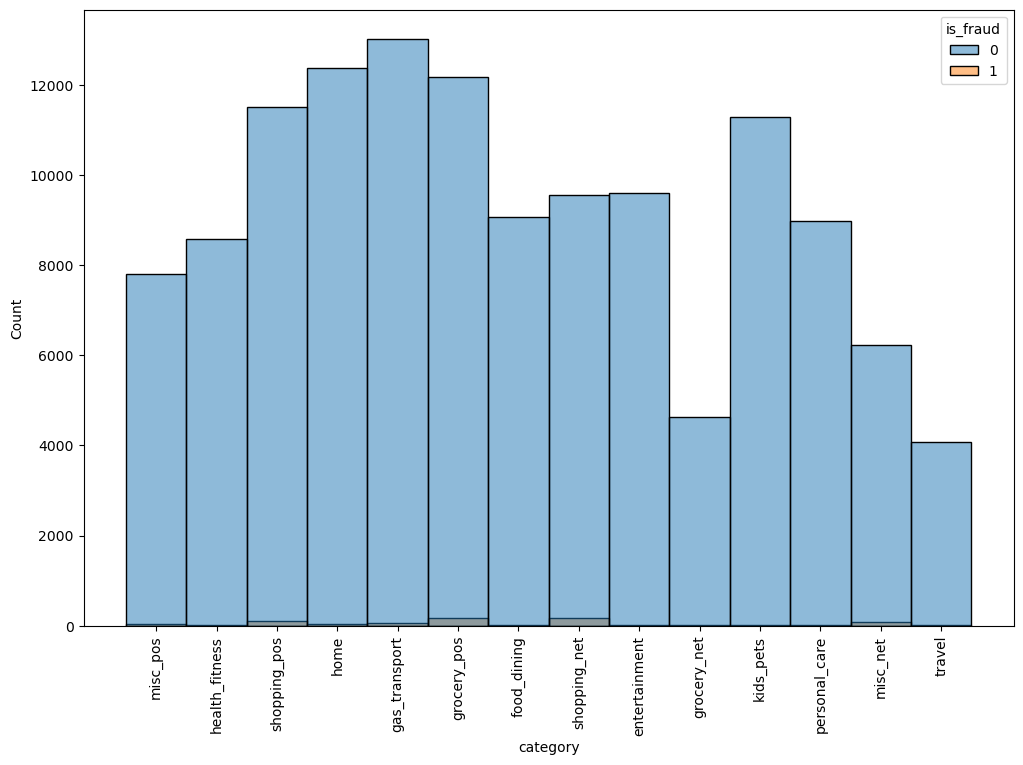

In [60]:
plt.figure(figsize=(12,8))
sns.histplot(sample_df, x='category', hue='is_fraud')
plt.xticks(rotation=90)

### Observation
- Based on the imbalancedness of the dataset, a dummy model would **predict non fraud and it would correct for 99.4%** of the time

## Data Splitting : Train, Val, Test

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [77]:
# Printing data
print(f"train set: {train_df.shape}")
print(f"Val set: {val_df.shape}")
print(f"test set: {test_df.shape}")

train set: (778005, 31)
Val set: (259335, 31)
test set: (259335, 31)


## INPUT and TARGET Columns

### 1. Hour and Minute

In [84]:
print(credit_df['hour'].value_counts())
print()
print()
print(credit_df['minute'].value_counts())

hour
0    1296675
Name: count, dtype: int64


minute
0    1296675
Name: count, dtype: int64


### Observations
- hour and minute have value 0, thus of no use

### 2. First and last names

In [99]:
print(credit_df['first'].value_counts())
print()
print()
print(credit_df['last'].value_counts())

first
Christopher    26669
Robert         21667
Jessica        20581
James          20039
Michael        20009
               ...  
Cameron            9
Phyllis            8
Molly              8
Angelica           7
Samantha           7
Name: count, Length: 352, dtype: int64


last
Smith        28794
Williams     23605
Davis        21910
Johnson      20034
Rodriguez    17394
             ...  
Wells            9
Peterson         9
Strong           8
Schaefer         7
Blake            7
Name: count, Length: 481, dtype: int64


In [101]:
input_cols = credit_df.iloc[:,:-1].columns.tolist()

# makes no diff
input_cols.remove('Unnamed: 0')
input_cols.remove('hour')
input_cols.remove('minute')

# parent columns
input_cols.remove('unix_time')
input_cols.remove('date')
input_cols.remove('time')
input_cols.remove('trans_date_trans_time')
input_cols.remove('dob')
input_cols.remove('first')
input_cols.remove('last')
input_cols.remove('long')

# Output colum


input_cols.remove('is_fraud')

# Checking cols
input_cols

['cc_num',
 'merchant',
 'category',
 'amt',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'city_pop',
 'job',
 'trans_num',
 'merch_lat',
 'merch_long',
 'year',
 'month',
 'day']

In [102]:
target_cols = "is_fraud"

## Input Features
- creating input vectors based on columns and datasets created

In [105]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[input_cols].copy()

In [108]:
test_target = test_df[target_cols].copy()

## Feature Types : Numerical / Categorical
- Setting Features ready for Scaling and Encoding data

In [114]:
num_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
cate_cols = train_inputs.select_dtypes('object').columns.tolist()

In [118]:
# New Num col
num_cols

['cc_num',
 'amt',
 'zip',
 'lat',
 'city_pop',
 'merch_lat',
 'merch_long',
 'year',
 'month',
 'day']

In [120]:
# New Cate col
cate_cols

['merchant',
 'category',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'trans_num']

In [122]:
# Checking stats : 
train_inputs[num_cols].describe()

,cc_num,amt,zip,lat,city_pop,merch_lat,merch_long,year,month,day
count,7.780050e+05,778005.000000,778005.000000,778005.000000,7.780050e+05,778005.000000,778005.000000,778005.000000,778005.000000,778005.000000
mean,4.175974e+17,70.294418,48781.708103,38.539064,8.894036e+04,38.539124,-90.215968,2019.286415,6.141999,15.585623
std,1.309366e+18,156.640254,26877.833555,5.075737,3.016162e+05,5.109659,13.757237,0.452086,3.418279,8.827051
min,6.041621e+10,1.000000,1257.000000,20.027100,2.300000e+01,19.029798,-166.671242,2019.000000,1.000000,1.000000
25%,1.800429e+14,9.630000,26237.000000,34.620500,7.410000e+02,34.731365,-96.891511,2019.000000,3.000000,8.000000
50%,3.521417e+15,47.570000,48174.000000,39.371600,2.456000e+03,39.368025,-87.427754,2019.000000,6.000000,15.000000
75%,4.642255e+15,83.260000,72011.000000,41.940400,2.032800e+04,41.958357,-80.239579,2020.000000,9.000000,23.000000
max,4.992346e+18,27390.120000,99783.000000,66.693300,2.906700e+06,67.441518,-66.956540,2020.000000,12.000000,31.000000


In [124]:
# Checking cate stats : 
train_inputs[cate_cols].describe().T

,count,unique,top,freq
merchant,778005,693,fraud_Kilback LLC,2613
category,778005,14,gas_transport,79098
gender,778005,2,F,426301
street,778005,983,864 Reynolds Plains,1918
city,778005,894,Birmingham,3428
state,778005,51,TX,56962
job,778005,494,Film/video editor,5846
trans_num,778005,778005,6357437ca65ab0682041358890183fca,1


## Missing Data Handling
- As we dont have msising data, We can skip Imputing values

## Numerical Data : Scaling
- Numeric columns have different set of ranges, which may make our job a bit difficult
- Thus we scale it to a range of 0 and 1 usinng MinMax Scaler
  

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scl = MinMaxScaler()
scl.fit(credit_df[num_cols])

MinMaxScaler()

In [132]:
# Transform values
train_inputs[num_cols] = scl.transform(train_inputs[num_cols])
val_inputs[num_cols] = scl.transform(val_inputs[num_cols])
test_inputs[num_cols] = scl.transform(test_inputs[num_cols])

## Categorical Data : Encoding Data
- Creating one hot encodes for categorical data

In [135]:
from sklearn.preprocessing import OneHotEncoder

In [137]:
ohc = OneHotEncoder(sparse_output=False,max_categories=5)
ohc.fit(credit_df[cate_cols])

OneHotEncoder(max_categories=5, sparse_output=False)

In [138]:
ohc.categories_

[array(['fraud_Abbott-Rogahn', 'fraud_Abbott-Steuber',
        'fraud_Abernathy and Sons', 'fraud_Abshire PLC',
        'fraud_Adams, Kovacek and Kuhlman', 'fraud_Adams-Barrows',
        'fraud_Altenwerth, Cartwright and Koss',
        'fraud_Altenwerth-Kilback', 'fraud_Ankunding LLC',
        'fraud_Ankunding-Carroll', 'fraud_Armstrong, Walter and Gottlieb',
        'fraud_Auer LLC', 'fraud_Auer-Mosciski', 'fraud_Auer-West',
        'fraud_Bahringer Group', 'fraud_Bahringer, Bergnaum and Quitzon',
        'fraud_Bahringer, Osinski and Block',
        'fraud_Bahringer, Schoen and Corkery', 'fraud_Bahringer-Larson',
        'fraud_Bahringer-Streich', 'fraud_Bailey-Morar',
        'fraud_Balistreri-Nader', 'fraud_Barrows PLC',
        'fraud_Bartoletti and Sons', 'fraud_Bartoletti-Wunsch',
        'fraud_Barton Inc', 'fraud_Barton LLC', 'fraud_Bashirian Group',
        'fraud_Bauch-Blanda', 'fraud_Bauch-Raynor', 'fraud_Baumbach Ltd',
        'fraud_Baumbach, Feeney and Morar',
        'f

In [139]:
encoded_cols = ohc.get_feature_names_out(cate_cols).tolist()
encoded_cols

['merchant_fraud_Cormier LLC',
 'merchant_fraud_Kilback LLC',
 'merchant_fraud_Kuhn LLC',
 'merchant_fraud_Schumm PLC',
 'merchant_infrequent_sklearn',
 'category_gas_transport',
 'category_grocery_pos',
 'category_home',
 'category_shopping_pos',
 'category_infrequent_sklearn',
 'gender_F',
 'gender_M',
 'street_0069 Robin Brooks Apt. 695',
 'street_4664 Sanchez Common Suite 930',
 'street_8172 Robertson Parkways Suite 072',
 'street_864 Reynolds Plains',
 'street_infrequent_sklearn',
 'city_Birmingham',
 'city_Phoenix',
 'city_San Antonio',
 'city_Utica',
 'city_infrequent_sklearn',
 'state_CA',
 'state_NY',
 'state_PA',
 'state_TX',
 'state_infrequent_sklearn',
 'job_Exhibition designer',
 'job_Film/video editor',
 'job_Naval architect',
 'job_Surveyor, land/geomatics',
 'job_infrequent_sklearn',
 'trans_num_ffffb8e3e4a2c7ea753eeec1601d34d6',
 'trans_num_ffffd9b860d3e38fe5b9ac2aa58a9e5a',
 'trans_num_ffffdd4a4136ac60e6a12e15c50be29d',
 'trans_num_ffffef9d89e7d02d86efb1d2ba4de008',
 

In [140]:
# Transform values
train_inputs[encoded_cols] = ohc.transform(train_inputs[cate_cols])
val_inputs[encoded_cols] = ohc.transform(val_inputs[cate_cols])
test_inputs[encoded_cols] = ohc.transform(test_inputs[cate_cols])

## Final Datasets

In [142]:
X_train = train_inputs[num_cols + encoded_cols]
X_val = val_inputs[num_cols + encoded_cols]
X_test = test_inputs[num_cols + encoded_cols]

## Model Building 
- This stage invovles building ML Models to work on our processed dataset
- Importing metrics to verify how well model is performing
- **NOTE** :
  - Dummy model predicting **NOT FRAUD** will be correct 99.4% of the time!
  - Thus we need to **focus on improving precision, recall and f1** along with **accuracy > 99.40%**

In [144]:
from sklearn.metrics import classification_report, confusion_matrix

### LOGISTIC REGERESSION

In [150]:
from sklearn.linear_model import LogisticRegression

In [184]:
LR = LogisticRegression(random_state=42, max_iter=100000, solver="liblinear")
LR.fit(X_train, train_target)

LogisticRegression(max_iter=100000, random_state=42, solver='liblinear')

In [185]:
print(f"LR Train: {LR.score(X_train, train_target)}")
print(f"LR Val: {LR.score(X_val, val_target)}")

LR Train: 0.9941555645529271
LR Val: 0.9939383422985714


In [186]:
set(preds)

{0, 1}

In [187]:
set(val_target)

{0, 1}

In [188]:
preds = LR.predict(X_val)
print(classification_report(val_target, preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257796
           1       0.00      0.00      0.00      1539

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



In [189]:
print(confusion_matrix(val_target, preds))

[[257763     33]
 [  1539      0]]


### Observation
- Accuracy is 99.38 on validation dataset :: Less than Dummy model
- Logistic Regression Failed to learn anything about class 1 ie Fraudulemt transcation
- Thus Logistic Regression may not be a good choice for this dataset

## RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [242]:
# Randomforest
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, train_target)
print(f"RF Train: {RF.score(X_train, train_target)}")
print(f"RF Val: {RF.score(X_val, val_target)}")

RF Train: 0.9999974293224336
RF Val: 0.9974280370948773


In [243]:
preds = RF.predict(X_val)
print(classification_report(val_target, preds))
print()
print(confusion_matrix(val_target, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257796
           1       0.92      0.62      0.74      1539

    accuracy                           1.00    259335
   macro avg       0.96      0.81      0.87    259335
weighted avg       1.00      1.00      1.00    259335


[[257715     81]
 [   586    953]]


### RF : TEST --> Hyperparameter tuning

In [248]:
# Randomforest
RF_2 = RandomForestClassifier(n_estimators=2000, max_depth=25, random_state=42, n_jobs=-1)
RF_2.fit(X_train, train_target)
print(f"RF Train: {RF_2.score(X_train, train_target)}")
print(f"RF Val: {RF_2.score(X_val, val_target)}")

RF Train: 0.999145249709192
RF Val: 0.9973933329477317


In [249]:
preds = RF_2.predict(X_val)
print(classification_report(val_target, preds))
print()
print(confusion_matrix(val_target, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257796
           1       0.93      0.61      0.73      1539

    accuracy                           1.00    259335
   macro avg       0.96      0.80      0.87    259335
weighted avg       1.00      1.00      1.00    259335


[[257725     71]
 [   605    934]]


In [244]:
### Randomforest
preds = RF.predict(X_test)
print(classification_report(test_target, preds))
print()
print(confusion_matrix(test_target, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.92      0.64      0.75      1520

    accuracy                           1.00    259335
   macro avg       0.96      0.82      0.88    259335
weighted avg       1.00      1.00      1.00    259335


[[257733     82]
 [   550    970]]


In [254]:
### Randomforest : TEST
preds = RF_2.predict(X_test)
print(classification_report(test_target, preds))
print()
print(confusion_matrix(test_target, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.92      0.63      0.75      1520

    accuracy                           1.00    259335
   macro avg       0.96      0.81      0.87    259335
weighted avg       1.00      1.00      1.00    259335


[[257733     82]
 [   566    954]]


### Observation
- ***Random Forest** was able to classify fraudulent data too
- This means, **Logistic Regression was too Simple** to work on **complex dataaset** such as credit card fraud
- Apporx 1000 of 1520 fraud class was detected correctly
- Overall **Accuracy(99.74 on validation)** > **99.4%** which means model learnt more about class Fraud too
- Precision, recall and f1 scores show a massive improvment over existing Logistic Regression model

## XGBoost

In [159]:
from xgboost import XGBClassifier

In [184]:
XCF = XGBClassifier(n_jobs=-1, random_state=42, n_estimators=1000, max_depth=25, booster='gbtree')
XCF.fit(X_train, train_target)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [185]:
print(f"XF Train: {XCF.score(X_train, train_target)}")
print(f"XF Val: {XCF.score(X_val, val_target)}")

XF Train: 1.0
XF Val: 0.9980758478415949


In [186]:
# Test Data
preds = XCF.predict(X_test)
print(classification_report(test_target, preds))
print()
print(confusion_matrix(test_target, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.91      0.77      0.83      1520

    accuracy                           1.00    259335
   macro avg       0.95      0.88      0.92    259335
weighted avg       1.00      1.00      1.00    259335


[[257697    118]
 [   354   1166]]


### Observation
- **XGBoost** surpasses the **Random Forest Classifier** in this case
- Some Hyperparameter tunining allowed us to better the overall performance of Fraud class classifying **approx 1200** out of **1520 correctly**
- A further **tuned XGB Model** can easily reach **80%+ accuracy** on **class Fraud** (0) estimation